In [1]:
import sympy as sym
import numpy as np
sym.init_printing() 
import scipy as sp
import matplotlib as mpl

import matplotlib.pyplot as plt



In [112]:
mpl.style.use('classic')

plt.rc('figure', figsize = (6, 4.5)) 
plt.rc('axes', labelsize=16, titlesize=14)
plt.rc('figure', autolayout = True)
t = sym.symbols('t')
f, g = sym.symbols('f g', cls=sym.Function)
k = 0.5
m = 40
l = 100
g = 10




In [113]:
diffeq = sym.Eq(((m*l**2)/3)*f(t).diff(t,t)+2*k*l**2*f(t)-((m*g*l)/2)*f(t),0)
print(diffeq)



Eq(-10000.0*f(t) + 133333.333333333*Derivative(f(t), (t, 2)), 0)


In [114]:
soln = sym.dsolve(diffeq,f(t))
print(soln)



Eq(f(t), C1*exp(-0.273861278752583*t) + C2*exp(0.273861278752583*t))


In [115]:
constants = sym.solve([soln.rhs.subs(t,0) - 6, soln.rhs.diff(t,1).subs(t,0)- 5])
constants
C1, C2 = sym.symbols('C1,C2')
soln = soln.subs(constants)
print(soln)
func = sym.lambdify(t,soln.rhs,'numpy')

Eq(f(t), 12.1287092917528*exp(0.273861278752583*t) - 6.12870929175277*exp(-0.273861278752583*t))


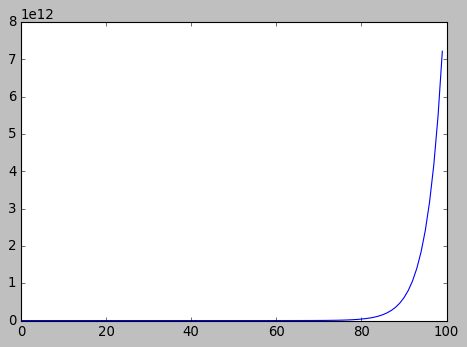

In [116]:
tt = np.arange(0,100,1) 
y = func(tt)
plt.figure(1)
plt.plot(tt,y);
plt.show()